In [71]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

# TP1

In [45]:
def readImagePgm(file_name):
    file = open(file_name, "r")
    lines = file.readlines() 
    for line in list(lines):
        if(line[0]=='#'):
            lines.remove(line)
    l = []
    for line in list(lines):
        for word in line.split():
            l.append(word)      
    p = l[0]
    if (p!='P2' and p!='P5'):
        print('Insupported format')
        exit()
    del(l[0]) 
    lx = int(l[0])
    del(l[0])
    ly = int(l[0])
    del(l[0])
    density = int(l[0])
    del(l[0])
    for i in range(0,len(l)):
        l[i] = int(l[i]) 
    l= np.array(l)       
    matrix = np.matrix(l.reshape((640, 480)))
    file.close()
    return matrix

In [46]:
matrix = readImagePgm('images/pic1.pgm')
matrix

matrix([[ 70, 205, 205, ..., 205, 205, 205],
        [205, 205, 205, ..., 205, 205, 205],
        [205, 205, 205, ..., 205, 205, 205],
        ...,
        [ 28,  30,  30, ..., 160, 164, 168],
        [180, 188, 191, ..., 194, 195, 195],
        [193, 193, 192, ...,  62,  79,  74]])

In [47]:
np.shape(matrix)

(640, 480)

In [48]:
def writeImagePgm(m, lx, ly, density):
    file = open("images/output.pgm", "w")
    file.write("P2")
    file.write(f'\n{lx}')
    file.write(f' {ly}')
    file.write(f'\n{density}\n')
    for x in range(lx):
        for y in range(ly):
            file.write(f'{m[x][y]} ')

In [49]:
image = writeImagePgm(readImagePgm('pic1.pgm'),640,480,255)

FileNotFoundError: [Errno 2] No such file or directory: 'pic1.pgm'

In [50]:
def mean_stdev(matrix):
    matrix = np.matrix(matrix)
    mean = matrix.mean()
    stdev = np.std(matrix)
    return mean, stdev

In [51]:
mean_stdev(matrix)

(155.12071940104167, 55.92556297565471)

In [52]:
def histogram (matrix):
    matrix = np.matrix(matrix)
    lx,ly = matrix.shape
    histogram = np.zeros(256).astype(int)
    for i in range (256):
        pixels_value_i = np.sum (matrix == i )
        histogram[i] = pixels_value_i
    return histogram

Text(0, 0.5, 'Frequency')

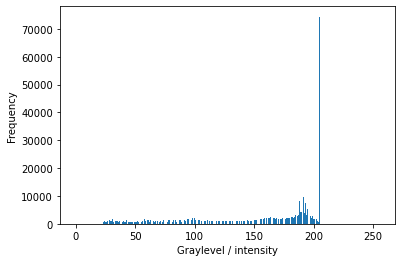

In [107]:
hist = histogram(matrix)
plt.bar(range(256), hist)
plt.xlabel('Graylevel / intensity')
plt.ylabel('Frequency')


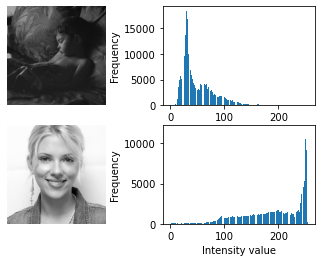

In [108]:
img1 = imageio.imread("images/nap.jpg")
img2 = imageio.imread("images/scarlett.jpg")

hist_img1 = histogram(img1)
hist_img2 = histogram(img2)

plt.subplot(221)
plt.imshow(img1, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(223)
plt.imshow(img2, cmap="gray", vmin=0, vmax=255)
plt.axis('off')

plt.subplot(222)
plt.bar(range(256), hist_img1)
plt.xlabel('Intensity value')
plt.ylabel('Frequency')

plt.subplot(224)
plt.bar(range(256), hist_img2)
plt.xlabel('Intensity value')
plt.ylabel('Frequency')
plt.show()

In [109]:
def cumulative_histogram (histogram):
    histC = np.zeros(256).astype(int)
    histC[0] = histogram[0]
    for i in range(1,  256):
        histC[i] = histogram[i] + histC[i-1]
    return(histC)

In [110]:
hist

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     1,   571,   971,   676,   721,
         828,  1258,   958,  1120,  1659,   531,  1092,   996,   900,
         488,  1035,   511,   550,  1185,   745,   726,  1384,   638,
         758,   805,   611,   747,   799,   511,   745,   868,   609,
         988,   634,   965,     0,  1631,  1002,  1247,  1249,   743,
        1205,     0,  1157,   673,  1046,     0,  1148,   679,  1150,
           0,   760,  1198,  1302,     0,   791,  1296,  1265,     0,
         750,  1299,     0,  1368,   767,     0,  1361,  1238,   810,
           0,  1434,   994,     0,  1612,  1650,     0,  1225,  2121,
           0,  2028,  1320,     0,  1396,  1466,     0,  1179,     0,
        1138,  1072,     0,  1317,   958,     0,   970,   993,     0,
        1119,   884,     0,   866,  1002,     0,  1006,   844,     0,
         900,  1078,

In [111]:
histC = cumulative_histogram (hist)
histC

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      1,    572,
         1543,   2219,   2940,   3768,   5026,   5984,   7104,   8763,
         9294,  10386,  11382,  12282,  12770,  13805,  14316,  14866,
        16051,  16796,  17522,  18906,  19544,  20302,  21107,  21718,
        22465,  23264,  23775,  24520,  25388,  25997,  26985,  27619,
        28584,  28584,  30215,  31217,  32464,  33713,  34456,  35661,
        35661,  36818,  37491,  38537,  38537,  39685,  40364,  41514,
        41514,  42274,  43472,  44774,  44774,  45565,  46861,  48126,
        48126,  48876,  50175,  50175,  51543,  52310,  52310,  53671,
        54909,  55719,  55719,  57153,  58147,  58147,  59759,  61409,
        61409,  62634,  64755,  64755,  66783,  68103,  68103,  69499,
        70965,  70965,  72144,  72144,  73282,  74354,  74354,  75671,
      

# TP2

In [112]:
def histogram_equalization(matrix):
    hist = histogram(matrix)
    histC = cumulative_histogram (hist)
    hist_transform = np.zeros(256).astype(np.uint8)
    N, M = matrix.shape
    # create the image to store the equalised version
    matrix_eq = np.zeros([N,M]).astype(np.uint8)
    for z in range(256):
        s = ((255)/float(M*N))*histC[z]
        matrix_eq[ np.where(matrix == z) ] = s
        hist_transform[z] = s
    return (matrix_eq, hist_transform)
        

In [113]:
img1_eq, img1_transf = histogram_equalization(img1)
img2_eq, img2_transf = histogram_equalization(img2)

In [114]:
# compute the new histograms (after equalisation)
histeq_img1 = histogram(img1_eq)
histeq_img2 = histogram(img2_eq)

In [ ]:
plt.figure(figsize=(14,14)) 
plt.subplot(3,2,1)
plt.imshow(img1, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(3,2,2)
plt.bar(range(256), hist_img1)
plt.xlabel('Intensity value')
plt.ylabel('Frequency')
plt.subplot(3,2,4)
plt.plot(range(256), img1_transf)
plt.xlabel('input pixel value (r)')
plt.ylabel('output pixel value (s)')

plt.subplot(3,2,5)
plt.imshow(img1_eq, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(3,2,6)
plt.bar(range(256), histeq_img1)
plt.xlabel('Intensity value')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

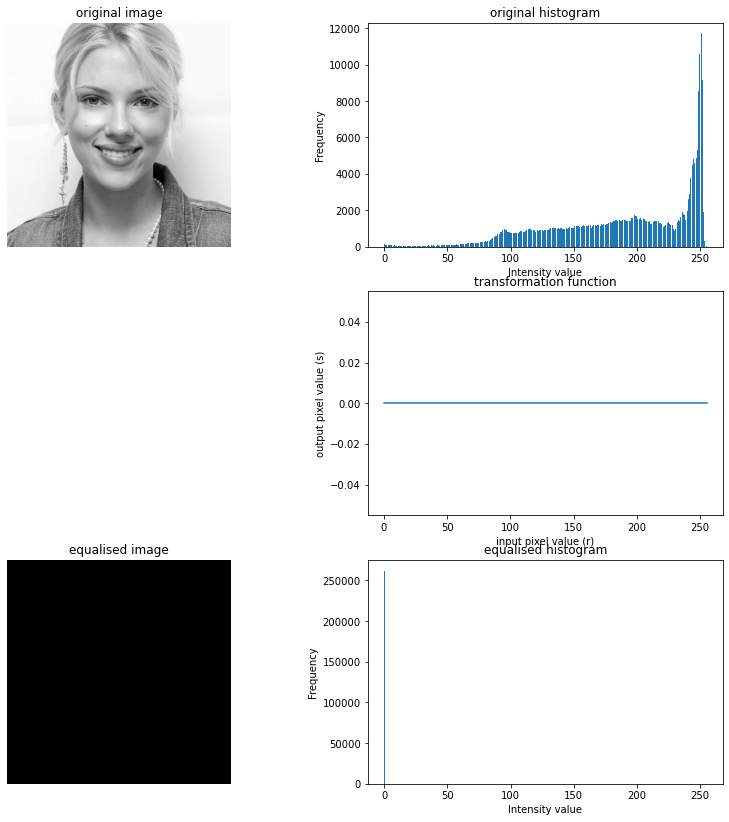

In [103]:
plt.figure(figsize=(14,14)) 

plt.subplot(3,2,1)
plt.imshow(img2, cmap="gray", vmin=0, vmax=255)
plt.title('original image')
plt.axis('off')
plt.subplot(3,2,2)
plt.bar(range(256), hist_img2)
plt.title('original histogram')
plt.xlabel('Intensity value')
plt.ylabel('Frequency')
plt.subplot(3,2,4)
plt.plot(range(256), img2_transf)
plt.title('transformation function')
plt.xlabel('input pixel value (r)')
plt.ylabel('output pixel value (s)')

plt.subplot(3,2,5)
plt.imshow(img2_eq, cmap="gray", vmin=0, vmax=255)
plt.title('equalised image')
plt.axis('off')
plt.subplot(3,2,6)
plt.bar(range(256), histeq_img2)
plt.title('equalised histogram')
plt.xlabel('Intensity value')
plt.ylabel('Frequency')